# Mathematik für Biologiestudierende II

Sommersemester 2025

13.05.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Themen

* $\chi^2$-Unabhängigkeitsstest 
* Mosaik-Grafik
* Durchführung mit `stats`
* Anwendbarkeit

# Tests für kategorielle Daten

# $\chi^2$-Unabhängigkeitsstest 

* Der Unabhängigkeitstest überprüft, ob zwei Merkmale stochastisch unabhängig sind
* Die Zufallsvariablen $X_1, \dots, X_n$ sind unabhängig mit gleicher Verteilung
* Die Zufallsvariablen $Y_1, \dots, Y_n$ sind unabhängig mit gleicher, aber möglicherweise anderer Verteilung
* Die Zufallsvariable $X_j$ beschreibt ein Merkmal mit den Ausprägungen $w_1, \dots, w_s$  
* Die Zufallsvariable $Y_j$ beschreibt ein Merkmal mit den Ausprägungen $v_1, \dots, v_r$
* Die Nullhypothese ist $P(X_1=w_\ell,\,Y_1=v_k) = P(X_1=w_\ell) \cdot P(Y_1=v_k)$ für alle Wahlen von $k$ und $\ell$ 

## Beispiel: Geschlechterverteilung in verschiedenen Fächern
   
Die Tafel zeigt die eingeschriebenen Erstsemester in einigen Fächern, sortiert nach Geschlecht

|                | Biologie | Biochemie | Chemie | Pharmazie |
|:---------------|----------|-----------|--------|-----------|
| weiblich       | 237      | 31        | 136    | 56        |
| nicht weiblich | 117      | 20        | 104    | 21        |

Quelle: https://www.hhu.de/die-hhu/profil/facts-figures/die-universitaet-in-zahlen/studierendenstatistik

<!--| Summe          | 354      | 51       | 240    | 77        |  -->

* Frage: Unterscheiden sich die Geschlechterverhältnisse zwischen den Fächern signifikant zum Niveau $\alpha = 0.05$
* Das ist die Frage nach der Unabhängigkeit der Merkmale "Studienfach" und "Geschlecht"

## Kontingenztafel

* Die oben abgebildete Tafel heißt *Kontingenztafel*
* Wir geben sie als DataFrame ein

In [2]:
tafel = pd.DataFrame(index=['weiblich', 'nicht weiblich'])
tafel['Biologie'] = [237, 117]
tafel['Biochemie'] = [31, 20]
tafel['Chemie'] = [136, 104]
tafel['Pharmazie'] = [56, 21]
tafel

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,237,31,136,56
nicht weiblich,117,20,104,21


In [3]:
from statsmodels.graphics.mosaicplot import mosaic

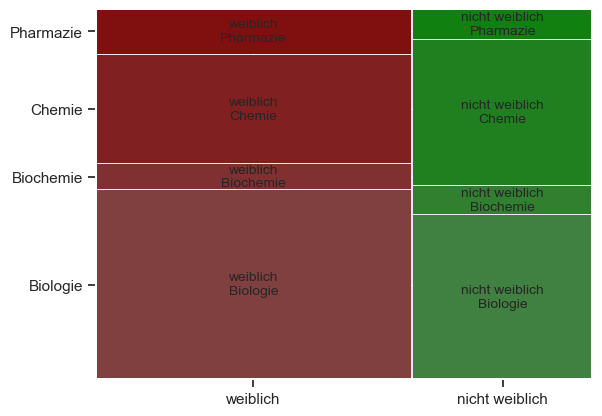

In [4]:
mosaic(tafel.stack());

Die ursprüngliche Kontingenztafel wird später noch gebraucht

In [5]:
df = tafel.copy()   #  df = tafel würde nur einen zweiten Namen vergeben

### Spaltensummen

In [6]:
df.sum()

Biologie     354
Biochemie     51
Chemie       240
Pharmazie     77
dtype: int64

In [7]:
df.loc['Summe'] = df.sum()
df

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,237,31,136,56
nicht weiblich,117,20,104,21
Summe,354,51,240,77


* `df.loc `…` ändert die **Zeile** mit dem entsprechenden Namen
* wenn sie noch nicht existiert, dann wird die hinzugefügt

### Zeilensummen

In [9]:
df.sum(axis=1)

weiblich          460
nicht weiblich    262
Summe             722
dtype: int64

In [10]:
df['Stud_insgesamt'] = df.sum(axis=1)
df

,Biologie,Biochemie,Chemie,Pharmazie,Stud_insgesamt
weiblich,237,31,136,56,460
nicht weiblich,117,20,104,21,262
Summe,354,51,240,77,722


Die Wahrscheinlichkeit, dass eine studierende Person weiblich ist, ist

In [11]:
p_w = 460 / 722
p_w

0.6371191135734072

Die Wahrscheinlichkeit, dass eine Person Biologie studiert, ist

In [12]:
p_bio = 354 / 722
p_bio

0.4903047091412742

Wenn Studienwahl und Geschlecht unabhängig sind, würde man im linken oberen Feld der Tafel den folgenden Wert erwarten

In [13]:
p_w * p_bio * 722

225.54016620498615

* Tatsächlich gibt es aber 237 weibliche Studierende der Biologie
* Ist das signifikant?
* Wie groß sind diese Abweichungen in den anderen Fächern?

In [14]:
n = df.loc['Summe'].Stud_insgesamt
n

722

In [15]:
p_faecher = df.loc['Summe'] / n
p_faecher

Biologie          0.490305
Biochemie         0.070637
Chemie            0.332410
Pharmazie         0.106648
Stud_insgesamt    1.000000
Name: Summe, dtype: float64

In [16]:
p_geschlecht = df.Stud_insgesamt / n
p_geschlecht

weiblich          0.637119
nicht weiblich    0.362881
Summe             1.000000
Name: Stud_insgesamt, dtype: float64

### Tafel der erwarteten Werte

In [17]:
erwartet = pd.DataFrame(index = tafel.index)

In [18]:
erwartet['Biologie'] = n * p_faecher['Biologie'] * p_geschlecht
erwartet['Biochemie'] = n * p_faecher['Biochemie'] * p_geschlecht
erwartet['Chemie'] = n * p_faecher['Chemie'] * p_geschlecht
erwartet['Pharmazie'] = n * p_faecher['Pharmazie'] * p_geschlecht
erwartet

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,225.540166,32.493075,152.908587,49.058172
nicht weiblich,128.459834,18.506925,87.091413,27.941828


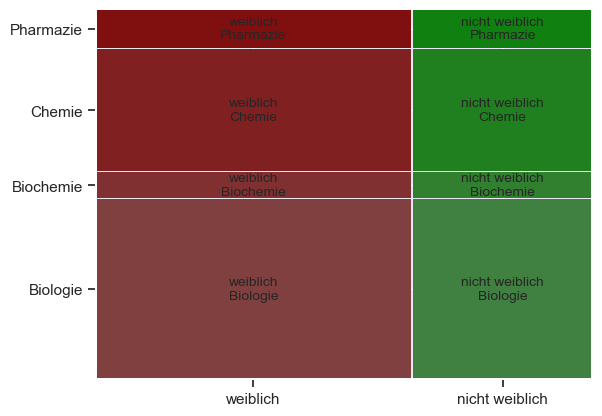

In [19]:
mosaic(erwartet.stack());

Das ist das Bild, wenn die beiden Zufallsvariablen unabhängig sind

Das tatsächliche Bild ist 

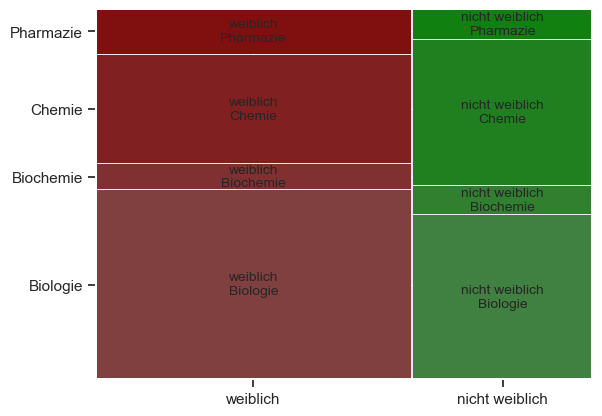

In [20]:
mosaic(tafel.stack());

#### Differenzen

In [21]:
tafel - erwartet

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,11.459834,-1.493075,-16.908587,6.941828
nicht weiblich,-11.459834,1.493075,16.908587,-6.941828


* Weil es fünfmal so viele Biologiestudierende wie Pharmaziestudierende gibt, ist der Unterschied von 7 Studierenden in der Pharmazie gewichtiger als der von 11 in der Biologie
* wir müssen die Differenzen normieren

* dabei werden die Differenzen quadriert und durch die erwarteten Werte geteilt

### Tabelle der normierten Differenzen

In [22]:
differenzen = (tafel-erwartet)**2 / erwartet
differenzen

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,0.582281,0.068608,1.869747,0.982282
nicht weiblich,1.022326,0.120456,3.282761,1.724618


Jetzt müssen wir wieder die Summen ausrechnen

In [23]:
differenzen.loc['Summe'] = differenzen.sum()
differenzen

,Biologie,Biochemie,Chemie,Pharmazie
weiblich,0.582281,0.068608,1.869747,0.982282
nicht weiblich,1.022326,0.120456,3.282761,1.724618
Summe,1.604607,0.189064,5.152508,2.706900


In [24]:
Gesamtsumme = sum(differenzen.loc['Summe'])
Gesamtsumme

9.653079025502825

Das ist die Teststatistik

In [25]:
t = Gesamtsumme

* Die zum $\chi^2$-Unabhängigkeitstest gehörende Verteilung ist die $\chi^2$-Verteilung
* Sie wird aufgerufen als `stats.chi2`
* Sie ist abhängig von der Zahl der Freiheitsgrade
* Wenn die Kontingenztafel $r$ Zeilen und $c$ Spalten hat, dann ist die Zahl der Freiheitsgrade gleich $(r-1) \cdot (c-1)$

* Im Beispiel ist das $(2-1) \cdot (4-1) = 3$ 

In [26]:
P = stats.chi2(3)

In [27]:
p = 1 - P.cdf(t)
p

0.021757400637373303

* Der *p*-Wert beträgt 0.022
* Der Unterschied ist signifikant

* letztes Jahr war er das nicht

## Berechnung mit `stats`

* Das geht auch automatisch
* Achtung:  Es muss die ursprüngliche Kontingenztafel ohne hinzugefügte Summenzeilen oder -spalten verwendet werden

In [28]:
res = stats.chi2_contingency(tafel)
res

Chi2ContingencyResult(statistic=9.65307902550282, pvalue=0.021757400637373383, dof=3, expected_freq=array([[225.5401662 ,  32.49307479, 152.90858726,  49.05817175],
       [128.4598338 ,  18.50692521,  87.09141274,  27.94182825]]))

In [29]:
res.pvalue

0.021757400637373383

In [30]:
res.statistic

9.65307902550282

Tabelle der erwarteten Werte (aber ohne Überschriften)

In [31]:
pd.DataFrame(res.expected_freq)

,0,1,2,3
0,225.540166,32.493075,152.908587,49.058172
1,128.459834,18.506925,87.091413,27.941828


Zahl der Freiheitsgrade

In [32]:
res.dof

3

## Anwendbarkeit

* Der $\chi^2$-Unabhängigkeitstest beruht auf einer Approximation
* Er ist nur zulässig, wenn alle erwarteten Werte mindestens den Wert 5 haben